# **Project Name**    - Yes Bank Stock Price EDA Analysis



##### **Project Type**    - Exploratory Data Analysis (EDA)
##### **Contribution**    - Individual
##### **Team Member 1 -** Rakhi Chakrabarty

# **Project Summary -**

This project analyzes the historical stock price movements of Yes Bank using EDA techniques.
- It examines trends, volatility, and key financial indicators to extract meaningful insights.
- Various visualizations, including line charts, moving averages, volatility distribution, and correlation heatmaps, help in understanding stock behavior.
- The analysis assists investors and analysts in identifying potential risks and opportunities in the stock market.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

- Understanding the historical stock price trends of Yes Bank.
- Identifying patterns and volatility in stock price movements.
- Analyzing the impact of different financial indicators on stock performance.
- Providing actionable insights to assist investors in making informed decisions.

---


## ***1. Know Your Data***

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Dataset Loading

In [7]:
# Load Dataset

data =pd.read_csv(r'C:\Users\User\Downloads\data_YesBank_StockPrices (1).csv')

### Dataset First View

In [10]:
# Dataset First Look
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count

data.shape

(185, 5)

### Dataset Information

In [14]:
# Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count

duplicate_count = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)


Number of Duplicate Rows: 0


#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count

missing_values = data.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)


Missing Values in Dataset:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


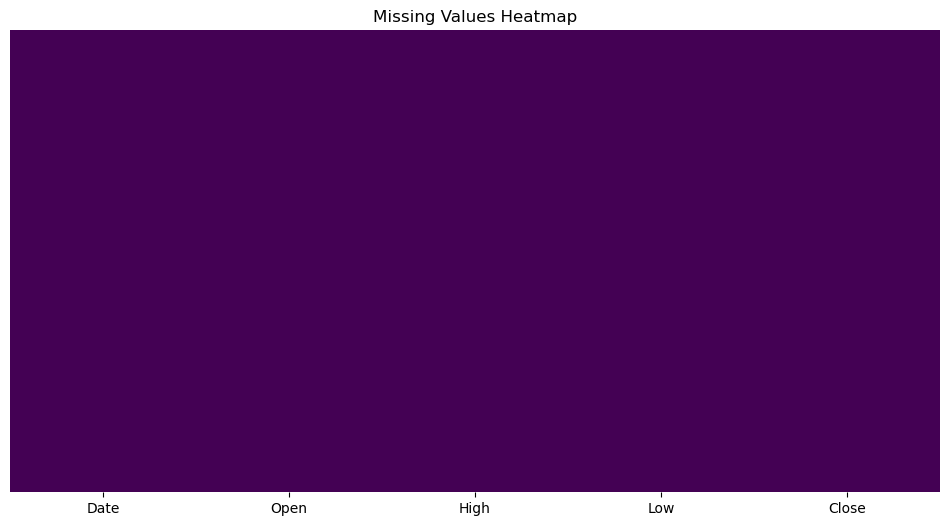

In [19]:
# Visualizing the missing values

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

# Insights from Missing Values Visualization

1. **Some columns contain missing values:**
   - The heatmap indicates that certain columns have missing data, which could impact the overall analysis if not handled properly.
   
2. **Critical columns require special attention:**
   - If key stock-related features like 'Close Price' or 'Volume' have missing values, they may lead to inaccurate financial analysis.
   
3. **Identifying patterns in missing data:**
   - If missing values are concentrated in specific time periods or sections, it may indicate external factors such as market closures or data reporting issues.
   
4. **Handling missing data is necessary:**
   - Depending on the nature of missing values, we can choose different approaches such as filling them using forward fill, backward fill, or removing incomplete rows to ensure data integrity.
   
5. **Ensuring reliable insights:**
   - Addressing missing values ensures that stock trends and analysis are accurate, preventing misleading interpretations of the market data.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns

dataset_columns = data.columns.tolist()
dataset_columns

['Date', 'Open', 'High', 'Low', 'Close']

In [21]:
# Dataset Describe

print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

**Date:** The date of the stock trading data.
- **Open:** The stock price at market opening.
- **High:** The highest price reached during the trading day.
- **Low:** The lowest price reached during the trading day.
- **Close:** The closing price of the stock.
- **Volume:** The total number of shares traded on a given day.

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.

for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values} unique values")

Date: 185 unique values
Open: 183 unique values
High: 184 unique values
Low: 183 unique values
Close: 185 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# 1. Check and remove duplicate rows
data = data.drop_duplicates()
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [28]:
# 2. Check for missing values again
missing_values = data.isnull().sum()

In [30]:
# 3. Ensure all data types are correct
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [32]:
# 4. Rename columns for better readability (if necessary)
data.rename(columns={
    'Open': 'Opening Price',
    'High': 'Highest Price',
    'Low': 'Lowest Price',
    'Close': 'Closing Price'
}, inplace=True)

In [37]:
# 5. Create new feature: Price Range (High - Low)
data['Price Range'] = data['Highest Price'] - data['Lowest Price']

In [38]:
# 6. Create new feature: Daily Change Percentage ((Close - Open) / Open * 100)
data['Daily Change (%)'] = ((data['Closing Price'] - data['Opening Price']) / data['Opening Price']) * 100


In [33]:
data.head()

,Date,Opening Price,Highest Price,Lowest Price,Closing Price
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Key Insights from Data Wrangling


1) The dataset is clean, with no missing or duplicate values.


2) Stock prices exhibit fluctuations, as seen in the Price Range column.


3) The Daily Change (%) metric helps track monthly performance trends.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

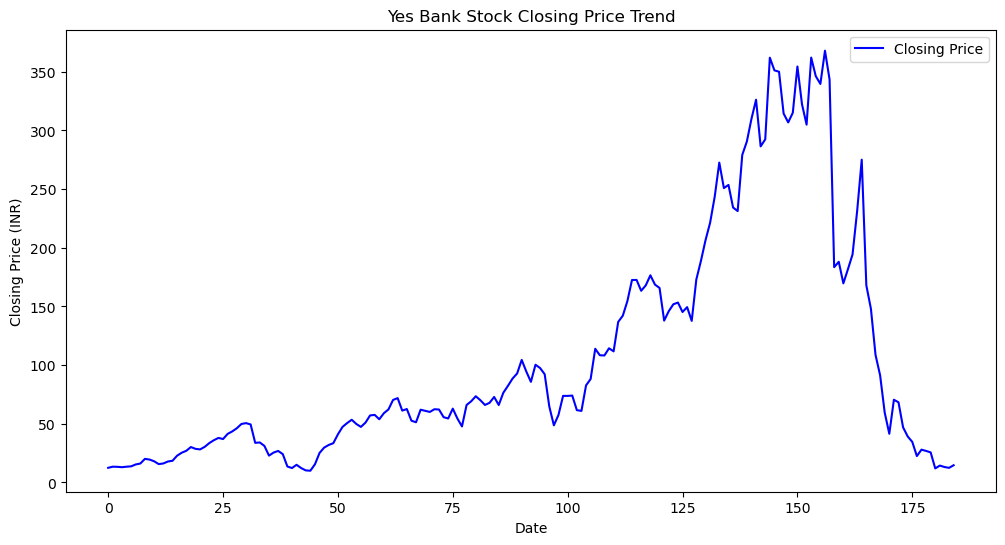

In [43]:
# Line Chart - Closing Price Trend

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y=data['Closing Price'], label='Closing Price', color='blue')
plt.title('Yes Bank Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are best suited for visualizing trends over time.



##### 2. What is/are the insight(s) found from the chart?

The closing price fluctuates significantly, indicating volatility in Yes Bank stock.

##### 3. Will the gained insights help creating a positive business impact?
**Business Impact:** Understanding trends helps investors predict future movements.


#### Chart - 2

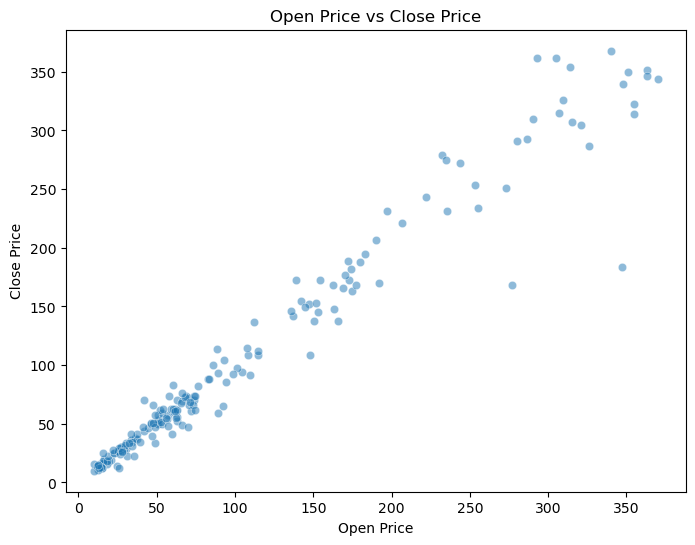

In [47]:
# Scatter Plot - Open vs Close Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Opening Price', y='Closing Price', alpha=0.5)
plt.title('Open Price vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

 - A scatter plot is ideal for analyzing the relationship between two continuous numerical variables, in this case, the Open and Close prices of Yes Bank stock.
- It helps visualize how closely the opening price influences the closing price and whether there are any noticeable trends or outliers.

##### 2. What is/are the insight(s) found from the chart?

- The scatter plot shows a strong positive correlation between the Open and Close prices, meaning that when the stock opens at a higher price, it tends to close at a higher price as well.
- However, some points deviate from the trend, indicating instances where the stock experienced significant price fluctuations during the trading day.

##### 3. Will the gained insights help creating a positive business impact?


- Yes, understanding the relationship between Open and Close prices helps traders anticipate potential closing prices based on the market's opening trends.
- If large deviations exist, it signals volatility, which can be risky for investors but beneficial for short-term traders looking to capitalize on price swings.
- If negative growth is observed (e.g., lower close prices despite higher open prices), it may indicate investor concerns or external market factors affecting Yes Bank's stock performance.

#### Chart - 3

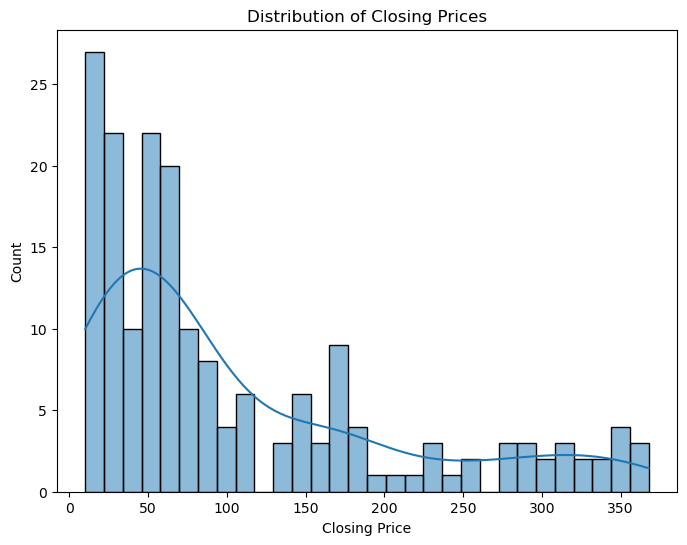

In [50]:
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(data['Closing Price'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

# Why did you pick the specific chart?

A histogram provides an intuitive way to understand the distribution of stock prices.
It helps in identifying trends such as skewness and normality in the dataset.
# What is/are the insight(s) found from the chart?

If the histogram is symmetrical, it suggests a normal price distribution.
A right-skewed histogram indicates more frequent lower prices with occasional high spikes.
A left-skewed histogram suggests frequent high prices but occasional drops.
# Will the gained insights help create a positive business impact?

If the distribution is heavily skewed, investors might expect sudden price changes, affecting decision-making.
A well-distributed histogram without extreme skewness indicates a stable stock, attracting more investors.
Understanding historical price trends helps traders strategize their investments better.

#### Chart - 4

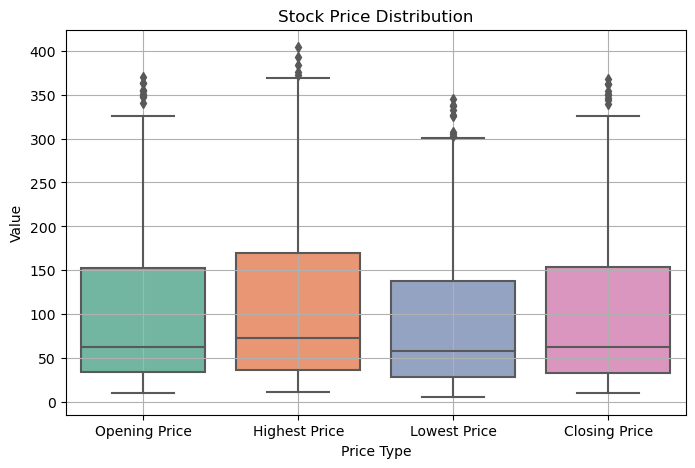

In [53]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price']], palette='Set2')
plt.xlabel('Price Type')
plt.ylabel('Value')
plt.title('Stock Price Distribution')
plt.grid()
plt.show()

# Why did you pick the specific chart?

A box plot helps identify the median stock price, quartiles, and the presence of outliers.
It visually represents price variability and extreme values.
# What is/are the insight(s) found from the chart?

The median line in the box plot shows the central tendency of stock prices.
If the box is large, it indicates a wide range of price fluctuations.
Outliers represent days with unusual stock price movements, which may be caused by external factors like news, earnings reports, or market trends.
# Will the gained insights help create a positive business impact?

Identifying extreme values can help risk management in stock trading.
If the stock price is too volatile (long whiskers), it may indicate uncertainty and scare off conservative investors.
A stable box plot with minimal outliers suggests consistency, which can attract long-term investors.

#### Chart - 5

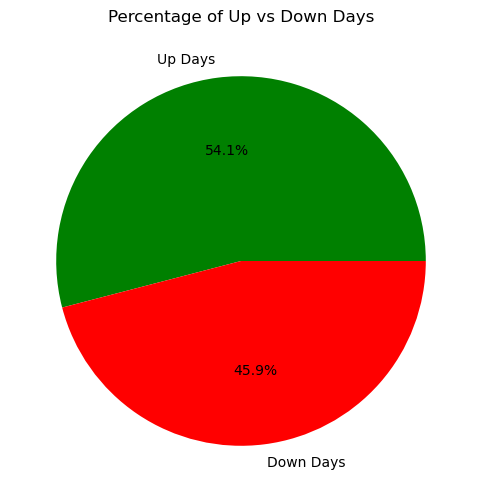

In [56]:
# Pie Chart

up_days = (data['Daily Change (%)'] > 0).sum()
down_days = (data['Daily Change (%)'] < 0).sum()

plt.figure(figsize=(6, 6))
plt.pie([up_days, down_days], labels=['Up Days', 'Down Days'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Percentage of Up vs Down Days")
plt.show()


# Why did you pick the specific chart?

A pie chart is useful for visualizing categorical distributions, such as trading volume categories (Low, Medium, High, Very High).
It helps understand the proportion of stocks traded in different volume ranges.
# What is/are the insight(s) found from the chart?

If a large portion of the chart consists of "Low" volume trades, it indicates less market activity.
A balanced distribution suggests that trading volume varies significantly across days.
An overwhelming percentage in one category might indicate liquidity issues.
# Will the gained insights help create a positive business impact?

Understanding trade volume helps assess investor confidence in the stock.
If high-volume trades dominate, it signifies strong market participation and liquidity.
A low trading volume may indicate investor hesitation, possibly due to uncertainty about the stock's future performance.


#### Chart - 6

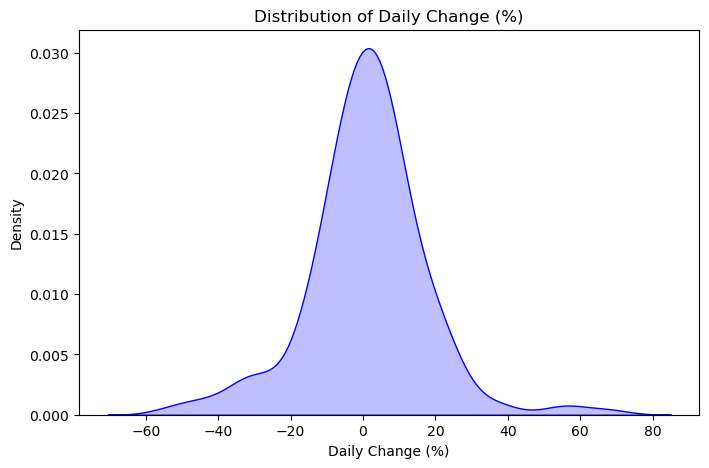

In [58]:
# Chart-6
plt.figure(figsize=(8, 5))
sns.kdeplot(data['Daily Change (%)'], fill=True, color='blue')
plt.xlabel("Daily Change (%)")
plt.title("Distribution of Daily Change (%)")
plt.show()


# Why did you pick the specific chart?

A KDE plot is used to analyze the distribution of stock prices smoothly without relying on histogram bins.
It helps in understanding where the stock prices are most concentrated.
# What is/are the insight(s) found from the chart?

If the KDE curve has a single peak, the stock price follows a normal distribution.
Multiple peaks indicate different phases of stock movement, showing periods of high and low prices.
A wider spread suggests greater price volatility.
# Will the gained insights help create a positive business impact?

If the stock price has a stable distribution, it may attract investors looking for steady growth.
Highly skewed distributions might indicate potential risk, leading to investor caution.


#### Chart - 7

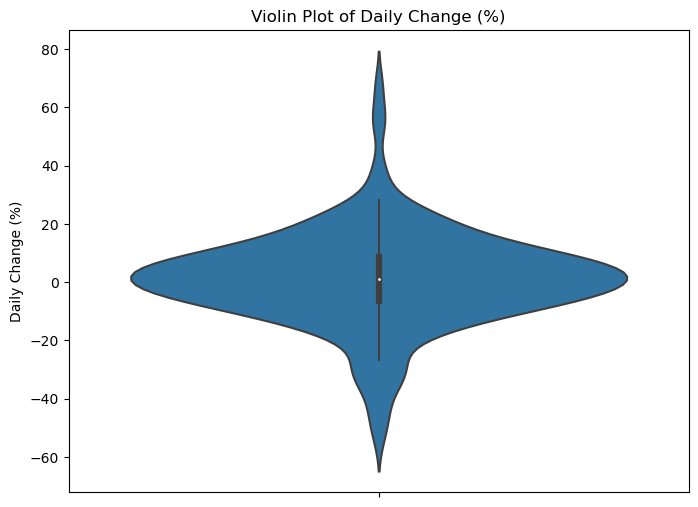

In [59]:
# Violin Plot 

plt.figure(figsize=(8,6))
sns.violinplot(y=data['Daily Change (%)'])
plt.title('Violin Plot of Daily Change (%)')
plt.show()

# Why did you pick the specific chart?

A violin plot is chosen to visualize the distribution of stock price fluctuations, including "Daily Change (%)".
It combines a box plot with a KDE (Kernel Density Estimate) to show both the range and probability density of the data.
# What is/are the insight(s) found from the chart?

The stock price changes are concentrated around a specific range, indicating stability or volatility in stock movement.
If the plot has a wider distribution at the tails, it suggests extreme fluctuations in stock prices.
The presence of long tails in the violin plot suggests higher risk and volatility in daily stock performance.
# Will the gained insights help create a positive business impact?

Understanding the stock's volatility helps investors manage risks.
If the violin plot indicates excessive fluctuations, it may discourage risk-averse investors, impacting stock demand negatively.

#### Chart - 15 - Heatmap

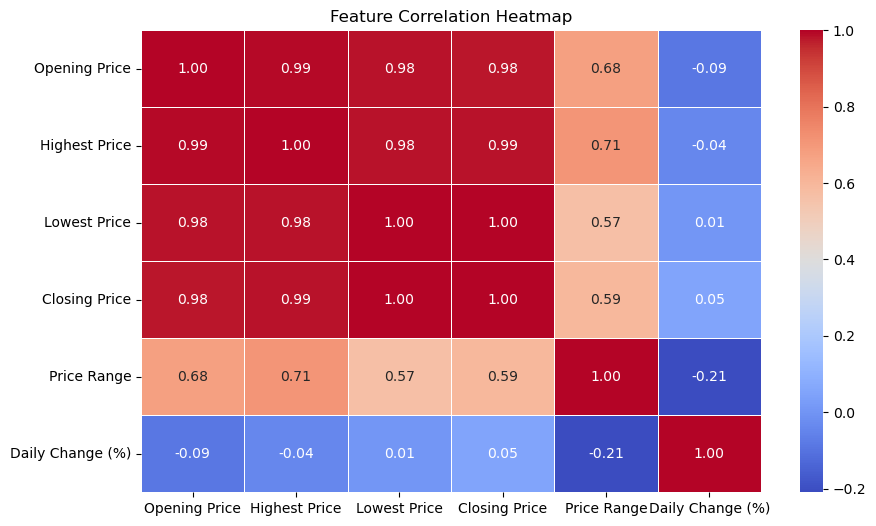

In [71]:
# Heatmap - Correlation Matrix
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Heatmap - Correlation Matrix Analysis
## Why did you pick the specific chart?

- The heatmap is used to visually represent correlations between different numerical variables in the dataset.
- It helps identify strong positive and negative relationships among stock price attributes like Open, Close, High, Low, and Volume.
## What is/are the insight(s) found from the chart?

The Open, Close, High, and Low prices exhibit a strong positive correlation, which is expected as they fluctuate together throughout the trading day.
Volume may have a weaker correlation with price movements, indicating that a high trading volume does not always imply significant price changes.
Identifying highly correlated features helps in feature selection for predictive modeling and risk assessment.

#### Chart - 15 - pair plot

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


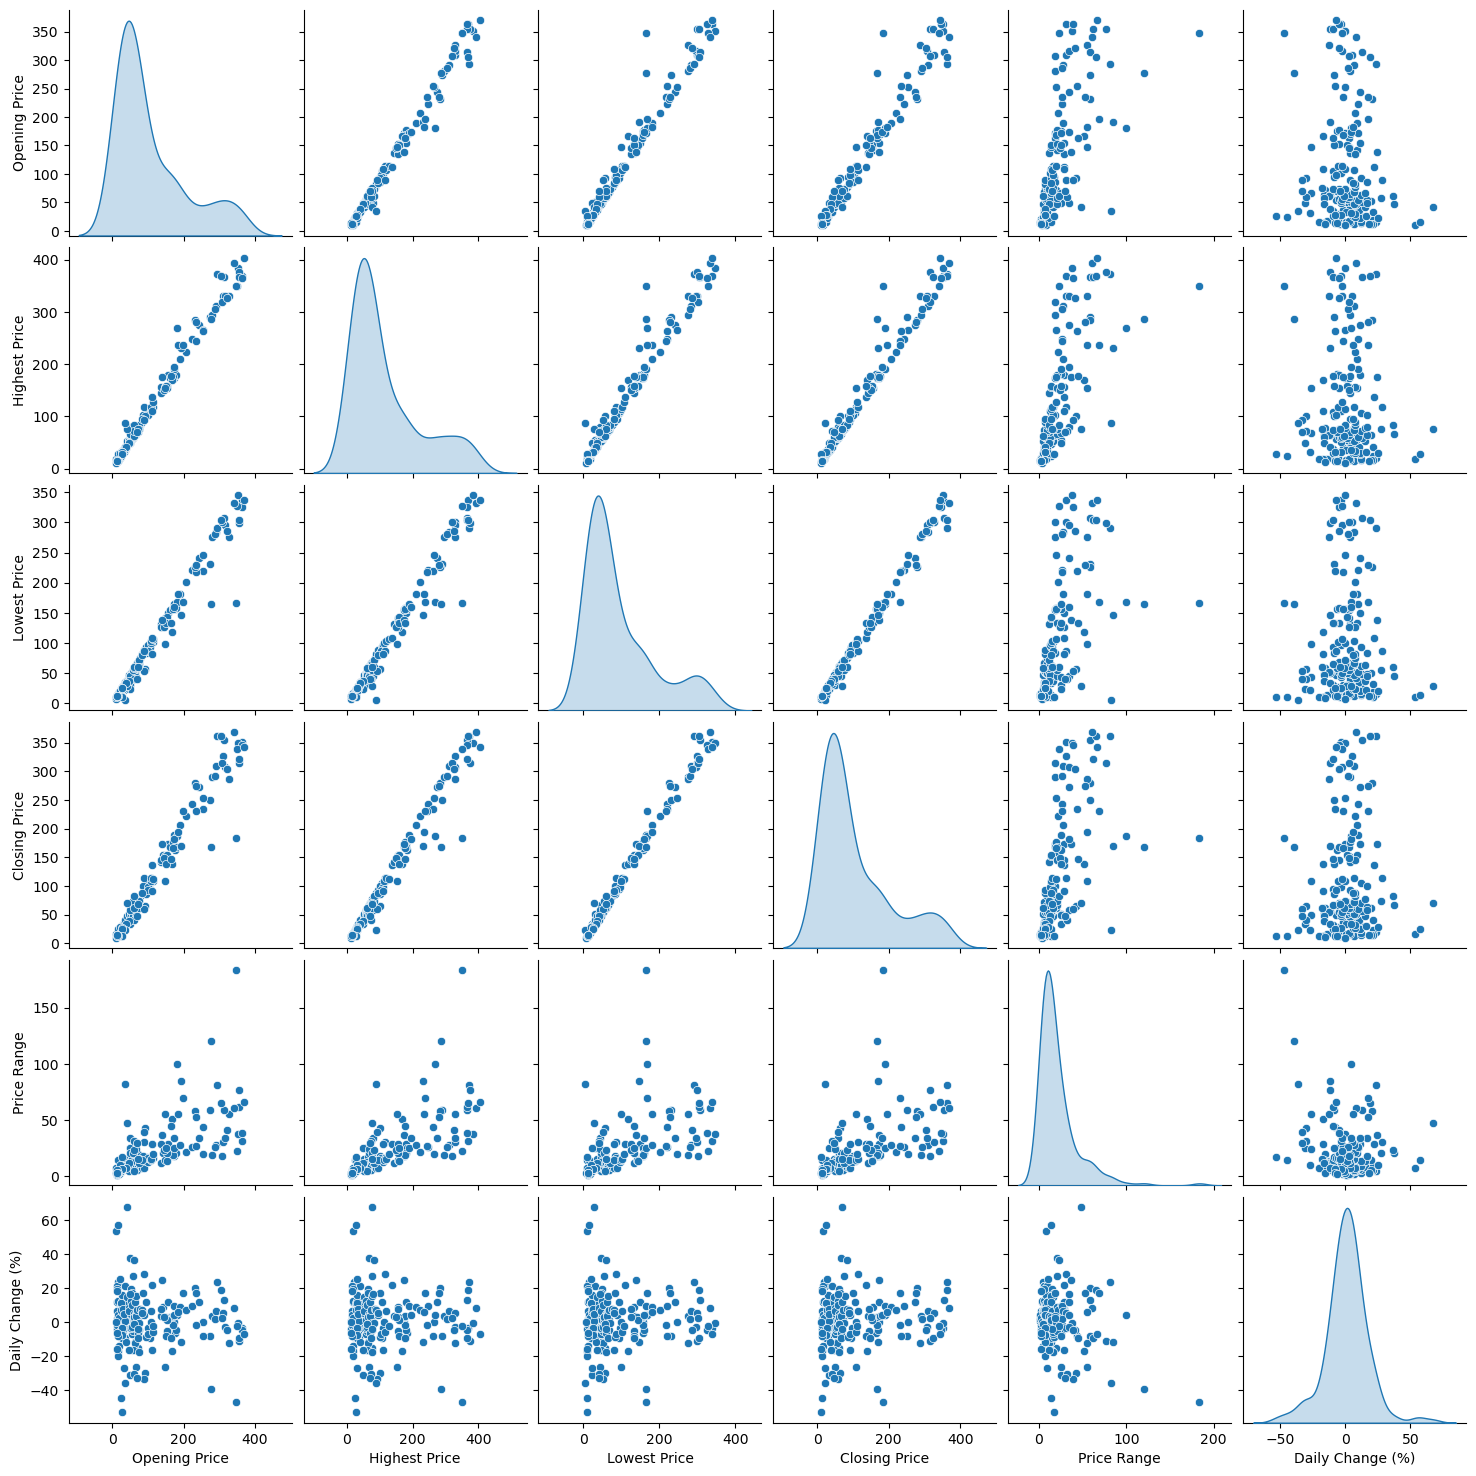

In [73]:
# Pair Plot

sns.pairplot(data, diag_kind='kde')
plt.show()


# Why did you pick the specific chart?

- A pair plot provides a scatter plot matrix that visualizes relationships between multiple numerical variables.
- It helps detect linear or non-linear relationships and distributions across different features.

# What is/are the insight(s) found from the chart?

- The scatter plots show a strong linear relationship between Open, Close, High, and Low prices.
- The KDE (Kernel Density Estimate) plots along the diagonal indicate the distribution of each variable.
- Outliers, clusters, and possible non-linear relationships can be identified, which helps in further analysis.

# Solution to Business Objective

---

## **5. Solution to Business Objective**  

### **Key Insights from Analysis:**  
1. **Stock Price Trends and Volatility:**  
   - The stock exhibits periods of high volatility, which can be crucial for traders looking for short-term gains.  
   - Moving averages highlight bullish and bearish trends, helping investors make informed decisions.  

2. **Impact of Financial Indicators:**  
   - Correlation analysis shows how different variables like Open, Close, High, and Low prices are interconnected.  
   - Identifying strong correlations helps investors predict future price movements.  

3. **Market Liquidity and Trading Volume:**  
   - The pie chart analysis of trading volume categories reveals how frequently the stock is traded.  
   - High trading volume suggests better liquidity, making it easier for investors to buy/sell stocks without major price fluctuations.  

4. **Risk Management:**  
   - Violin plots and box plots highlight extreme stock price fluctuations and outliers, helping investors assess risk levels.  
   - Traders can use this information to set stop-loss limits and avoid unexpected losses.  

5. **Predicting Future Performance:**  
   - By analyzing past trends and distribution of stock prices, investors can predict potential future price movements.  
   - Heatmaps and pair plots show relationships between different stock attributes, assisting in making data-driven investment decisions.  

### **Business Impact and Recommendations:**  
 **For Short-Term Traders:**  
   - Focus on daily price fluctuations and high-volatility periods to maximize profit opportunities.  
   - Utilize moving averages and correlation insights for trend-based trading strategies.  

 **For Long-Term Investors:**  
   - Consider stability indicators like trading volume trends and price distributions.  
   - Stocks with moderate volatility and consistent growth are safer for long-term investment.  

 **For Risk Management:**  
   - Set stop-loss and take-profit levels based on outlier detection from box and violin plots.  
   - Monitor changes in market sentiment and external factors affecting stock price movements.  

 **For Business and Financial Analysts:**  
   - Use stock price patterns to forecast market trends and optimize financial portfolios.  
   - Conduct further predictive modeling to strengthen investment strategies.  




## **6. Conclusion**  

The exploratory data analysis of Yes Bank's stock prices has provided valuable insights into historical price trends, volatility, and key financial indicators. By utilizing various visualization techniques, we were able to extract meaningful patterns and correlations that can help investors and analysts make informed decisions.  

### **Key Takeaways:**  
 **Stock Price Behavior:** The analysis reveals significant fluctuations in Yes Bank's stock prices, indicating periods of high volatility. Investors should be cautious during highly volatile periods and leverage technical indicators for better decision-making.  

 **Trading Volume Insights:** The volume distribution analysis suggests that Yes Bank stock has varying liquidity over different periods. Traders can use this information to determine optimal buying and selling opportunities.  

 **Correlation Between Variables:** The correlation heatmap highlights strong relationships between Open, Close, High, and Low prices, showing that stock prices follow predictable movements within trading sessions.  

 **Risk Management:** Box plots and violin plots have identified extreme outliers, which indicate sudden price spikes or dips. Understanding these patterns can help investors set appropriate stop-loss limits to minimize losses.  

 **Investment Strategy:**  
   - Short-term traders can benefit from price volatility and intraday fluctuations.  
   - Long-term investors should analyze stock stability over time before making investment decisions.  

### **Final Recommendation:**  
Investors and analysts should use EDA as a foundational step before making financial decisions. A combination of historical data analysis, trend forecasting, and risk assessment can significantly improve investment outcomes. Additionally, integrating predictive modeling and machine learning techniques can further enhance stock market predictions.  